<a href="https://colab.research.google.com/github/tringuyen180303/Sales_prediction/blob/main/Copy_of_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import statsmodels.tsa.api as smt

In [ ]:
import tensorflow as tf


In [ ]:
def load_data():
  return pd.read_csv('train.csv')
sales_data = load_data()
print(sales_data.head())

         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10


In [ ]:
def monthly_sales(data):
    monthly_data = data.copy()
    monthly_data.date = monthly_data.date.apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('date')['sales'].sum().reset_index()
    print("Monthly data", monthly_data)
    monthly_data.date = pd.to_datetime(monthly_data.date)
    #print(monthly_data)
    return monthly_data
monthly_sales(sales_data)
monthly_df = monthly_sales(sales_data)
print(monthly_df.head())

Monthly data        date    sales
0   2013-01   454904
1   2013-02   459417
2   2013-03   617382
3   2013-04   682274
4   2013-05   763242
5   2013-06   795597
6   2013-07   855922
7   2013-08   766761
8   2013-09   689907
9   2013-10   656587
10  2013-11   692643
11  2013-12   506607
12  2014-01   525987
13  2014-02   529117
14  2014-03   704301
15  2014-04   788914
16  2014-05   882877
17  2014-06   906842
18  2014-07   989010
19  2014-08   885596
20  2014-09   785124
21  2014-10   758883
22  2014-11   800783
23  2014-12   578048
24  2015-01   552513
25  2015-02   551317
26  2015-03   730951
27  2015-04   824467
28  2015-05   926902
29  2015-06   937184
30  2015-07  1037350
31  2015-08   920401
32  2015-09   823332
33  2015-10   797253
34  2015-11   827645
35  2015-12   607572
36  2016-01   602439
37  2016-02   614957
38  2016-03   790881
39  2016-04   901950
40  2016-05   988730
41  2016-06  1022664
42  2016-07  1138718
43  2016-08   981494
44  2016-09   896831
45  2016-10   863637


In [ ]:
def sales_duration(data):
    data.date = pd.to_datetime(data.date)
    print(data.date)
    number_of_days = data.date.max() - data.date.min()
    number_of_years = number_of_days.days / 365
    print(number_of_days.days, " days")
    print(number_of_years, " years")
sales_duration(sales_data)

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: date, Length: 913000, dtype: datetime64[ns]
1825  days
5.0  years


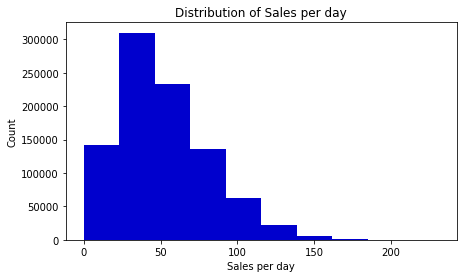

In [ ]:
def sales_per_day():
    fig, ax = plt.subplots(figsize=(7, 4))
    plt.hist(sales_data.sales, color = "mediumblue")
    
    ax.set(xlabel="Sales per day",
          ylabel= "Count",
          title="Distribution of Sales per day")
    plt.show()
sales_per_day()

   store    sales
0      1  4315603
1      2  6120128
2      3  5435144
3      4  5012639
4      5  3631016
5      6  3627670
6      7  3320009
7      8  5856169
8      9  5025976
9     10  5360158


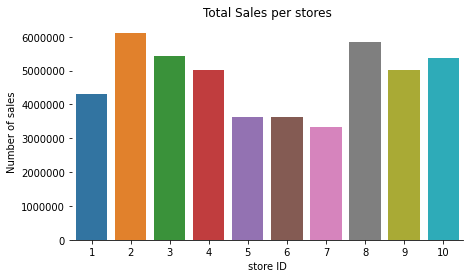

In [ ]:
def sales_per_store():
    by_store = sales_data.groupby("store")['sales'].sum().reset_index()
    print(by_store)
    fig, ax = plt.subplots(figsize=(7,4))
    sns.barplot(x = by_store.store, y= by_store.sales)
    ax.set(xlabel="store ID",
          ylabel="Number of sales",
          title="Total Sales per stores")
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
    sns.despine(left=True)
  

sales_per_store()

In [ ]:
avg_monthly_sales = monthly_df.sales.mean()
print("Overall average monthly sales", avg_monthly_sales)
avg_monthly_sales_12month = monthly_df.sales[-12:].mean()
print(f"Last 12 months average monthly sales: ${avg_monthly_sales_12month}")


Overall average monthly sales 795075.2
Last 12 months average monthly sales: $894478.3333333334


0     2013
1     2013
2     2013
3     2013
4     2013
5     2013
6     2013
7     2013
8     2013
9     2013
10    2013
11    2013
12    2014
13    2014
14    2014
15    2014
16    2014
17    2014
18    2014
19    2014
20    2014
21    2014
22    2014
23    2014
24    2015
25    2015
26    2015
27    2015
28    2015
29    2015
30    2015
31    2015
32    2015
33    2015
34    2015
35    2015
36    2016
37    2016
38    2016
39    2016
40    2016
41    2016
42    2016
43    2016
44    2016
45    2016
46    2016
47    2016
48    2017
49    2017
50    2017
51    2017
52    2017
53    2017
54    2017
55    2017
56    2017
57    2017
58    2017
59    2017
Name: date, dtype: int64
0   2013-01-01
1   2014-01-01
2   2015-01-01
3   2016-01-01
4   2017-01-01
Name: date, dtype: datetime64[ns]
182 days, 12:00:00


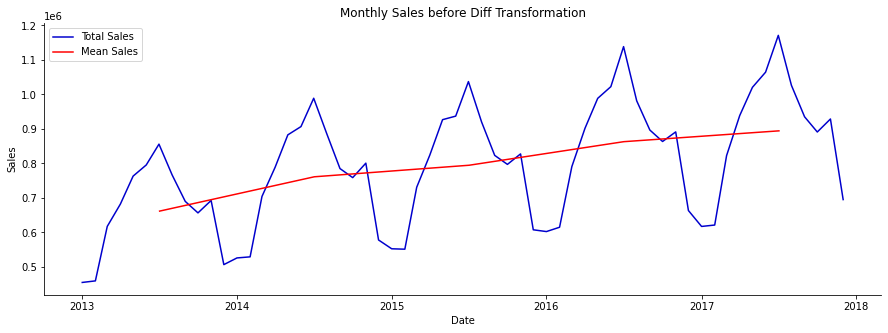

In [ ]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.lineplot(data=data,x = x_col, y=y_col, ax=ax, color="mediumblue", label="Total Sales")
    second = data.groupby(data.date.dt.year)[y_col].mean().reset_index()
    print(data.date.dt.year)
    second.date = pd.to_datetime(second.date, format="%Y")
    print(second.date)
    print(datetime.timedelta(6* 365/12))
    sns.lineplot(x = (second.date + datetime.timedelta(6 * 365/12)), y=y_col, data=second, ax=ax, color="red",
                 label="Mean Sales")
    ax.set(xlabel="Date",
          ylabel="Sales",
          title=title)
    sns.despine()
time_plot(monthly_df, "date", "sales", "Monthly Sales before Diff Transformation")

In [ ]:
import csv
import os
def get_diff(data):
    data['sales_diff'] = data.sales.diff()
    data = data.dropna()
    data.to_csv(os.getcwd() +'/stationary_df.csv',
               index=False)
    return data
stationary_df = get_diff(monthly_df)

<bound method Series.diff of 0      454904
1      459417
2      617382
3      682274
4      763242
5      795597
6      855922
7      766761
8      689907
9      656587
10     692643
11     506607
12     525987
13     529117
14     704301
15     788914
16     882877
17     906842
18     989010
19     885596
20     785124
21     758883
22     800783
23     578048
24     552513
25     551317
26     730951
27     824467
28     926902
29     937184
30    1037350
31     920401
32     823332
33     797253
34     827645
35     607572
36     602439
37     614957
38     790881
39     901950
40     988730
41    1022664
42    1138718
43     981494
44     896831
45     863637
46     891448
47     663411
48     617306
49     621369
50     822667
51     938862
52    1020686
53    1064624
54    1171393
55    1026403
56     935263
57     891160
58     928837
59     695170
Name: sales, dtype: int64>
1     2013
2     2013
3     2013
4     2013
5     2013
6     2013
7     2013
8     2013
9     2013
10   

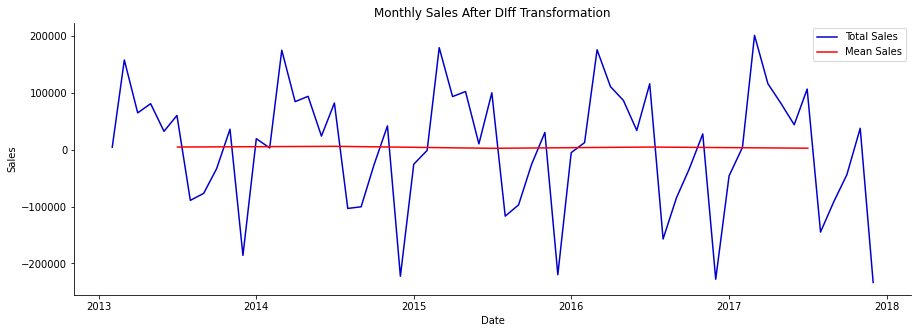

In [ ]:
print(monthly_df.sales.diff)
stationary_df = get_diff(monthly_df)
time_plot(stationary_df, "date", "sales_diff", "Monthly Sales After DIff Transformation")


            sales_diff
date                  
2013-02-01      4513.0
2013-03-01    157965.0
2013-04-01     64892.0
2013-05-01     80968.0
2013-06-01     32355.0
2013-07-01     60325.0
2013-08-01    -89161.0
2013-09-01    -76854.0
2013-10-01    -33320.0
2013-11-01     36056.0
2013-12-01   -186036.0
2014-01-01     19380.0
2014-02-01      3130.0
2014-03-01    175184.0
2014-04-01     84613.0
2014-05-01     93963.0
2014-06-01     23965.0
2014-07-01     82168.0
2014-08-01   -103414.0
2014-09-01   -100472.0
2014-10-01    -26241.0
2014-11-01     41900.0
2014-12-01   -222735.0
2015-01-01    -25535.0
2015-02-01     -1196.0
2015-03-01    179634.0
2015-04-01     93516.0
2015-05-01    102435.0
2015-06-01     10282.0
2015-07-01    100166.0
2015-08-01   -116949.0
2015-09-01    -97069.0
2015-10-01    -26079.0
2015-11-01     30392.0
2015-12-01   -220073.0
2016-01-01     -5133.0
2016-02-01     12518.0
2016-03-01    175924.0
2016-04-01    111069.0
2016-05-01     86780.0
2016-06-01     33934.0
2016-07-01 

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


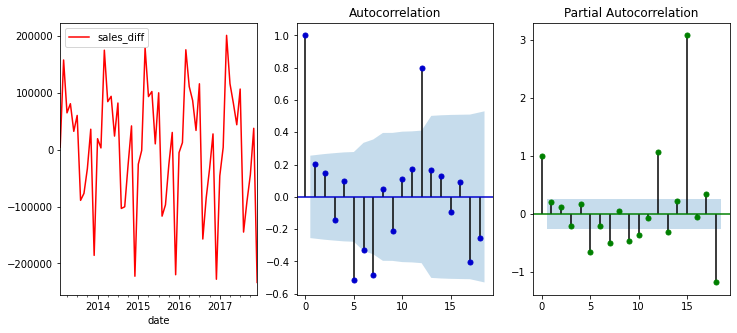

In [ ]:
def plots(data, lags=None):
    ddt_data = data.set_index('date').drop('sales', axis=1)
    print(ddt_data)
    print(ddt_data.isnull())
    print(ddt_data.isnull().values.any())
    # delete the nan values
    ddt_data.dropna(axis=0)
    
    
    layout = (1, 3)
    raw = plt.subplot2grid(layout, (0,0))
    acf = plt.subplot2grid(layout, (0,1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    ddt_data.plot(ax=raw, figsize=(12, 5), color="red")
    smt.graphics.plot_acf(ddt_data, lags = lags, ax=acf, color="mediumblue")
    smt.graphics.plot_pacf(ddt_data, lags=lags, ax = pacf, color='green')
    
plots(stationary_df)

In [ ]:
# create dataframe for transformation from time series to supervised
import os
def generate_supervised(data):
    supervised_df = data.copy()
    for i in range(1, 13):
        col_name = "lag_" + str(i)
        print(col_name)
        supervised_df[col_name] = supervised_df['sales_diff'].shift(i)
    print(supervised_df.isna().count())
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    print('supervised', supervised_df)
    supervised_df.to_csv(os.getcwd() +'/model_df.csv')
    return supervised_df
model_df = generate_supervised(stationary_df)
print(model_df)
print("verified", pd.read_csv("model_df.csv"))


lag_1
lag_2
lag_3
lag_4
lag_5
lag_6
lag_7
lag_8
lag_9
lag_10
lag_11
lag_12
date          59
sales         59
sales_diff    59
lag_1         59
lag_2         59
lag_3         59
lag_4         59
lag_5         59
lag_6         59
lag_7         59
lag_8         59
lag_9         59
lag_10        59
lag_11        59
lag_12        59
dtype: int64
supervised          date    sales  sales_diff     lag_1     lag_2     lag_3     lag_4  \
0  2014-02-01   529117      3130.0   19380.0 -186036.0   36056.0  -33320.0   
1  2014-03-01   704301    175184.0    3130.0   19380.0 -186036.0   36056.0   
2  2014-04-01   788914     84613.0  175184.0    3130.0   19380.0 -186036.0   
3  2014-05-01   882877     93963.0   84613.0  175184.0    3130.0   19380.0   
4  2014-06-01   906842     23965.0   93963.0   84613.0  175184.0    3130.0   
5  2014-07-01   989010     82168.0   23965.0   93963.0   84613.0  175184.0   
6  2014-08-01   885596   -103414.0   82168.0   23965.0   93963.0   84613.0   
7  2014-09-01   785124

In [ ]:
def generate_arima_data(data):
    dt_data = data.set_index('date').drop('sales', axis=1)
    dt_data.dropna(axis=0)
    
    dt_data.to_csv('arima_df.csv')
    
    return dt_data

In [ ]:
datetime_df = generate_arima_data(stationary_df)

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#from keras.layers import LSTM
import pickle
model_df = pd.read_csv("model_df.csv")
print(model_df.head())

   Unnamed: 0        date   sales  sales_diff     lag_1     lag_2     lag_3  \
0           0  2014-02-01  529117      3130.0   19380.0 -186036.0   36056.0   
1           1  2014-03-01  704301    175184.0    3130.0   19380.0 -186036.0   
2           2  2014-04-01  788914     84613.0  175184.0    3130.0   19380.0   
3           3  2014-05-01  882877     93963.0   84613.0  175184.0    3130.0   
4           4  2014-06-01  906842     23965.0   93963.0   84613.0  175184.0   

      lag_4     lag_5     lag_6    lag_7    lag_8    lag_9   lag_10    lag_11  \
0  -33320.0  -76854.0  -89161.0  60325.0  32355.0  80968.0  64892.0  157965.0   
1   36056.0  -33320.0  -76854.0 -89161.0  60325.0  32355.0  80968.0   64892.0   
2 -186036.0   36056.0  -33320.0 -76854.0 -89161.0  60325.0  32355.0   80968.0   
3   19380.0 -186036.0   36056.0 -33320.0 -76854.0 -89161.0  60325.0   32355.0   
4    3130.0   19380.0 -186036.0  36056.0 -33320.0 -76854.0 -89161.0   60325.0   

     lag_12  
0    4513.0  
1  157965.

In [72]:
def tts(data):
    data = data.drop(['sales', 'date', "Unnamed: 0"], axis=1)
    train, test = data[0:-12].values, data[-12:].values
    return train, test
print(model_df.head())
train, test = tts(model_df)


   Unnamed: 0        date   sales  sales_diff     lag_1     lag_2     lag_3  \
0           0  2014-02-01  529117      3130.0   19380.0 -186036.0   36056.0   
1           1  2014-03-01  704301    175184.0    3130.0   19380.0 -186036.0   
2           2  2014-04-01  788914     84613.0  175184.0    3130.0   19380.0   
3           3  2014-05-01  882877     93963.0   84613.0  175184.0    3130.0   
4           4  2014-06-01  906842     23965.0   93963.0   84613.0  175184.0   

      lag_4     lag_5     lag_6    lag_7    lag_8    lag_9   lag_10    lag_11  \
0  -33320.0  -76854.0  -89161.0  60325.0  32355.0  80968.0  64892.0  157965.0   
1   36056.0  -33320.0  -76854.0 -89161.0  60325.0  32355.0  80968.0   64892.0   
2 -186036.0   36056.0  -33320.0 -76854.0 -89161.0  60325.0  32355.0   80968.0   
3   19380.0 -186036.0   36056.0 -33320.0 -76854.0 -89161.0  60325.0   32355.0   
4    3130.0   19380.0 -186036.0  36056.0 -33320.0 -76854.0 -89161.0   60325.0   

     lag_12  
0    4513.0  
1  157965.

In [73]:
print(train.shape)

(35, 13)


In [74]:
print(test.shape)

(12, 13)


In [75]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils

In [95]:
def scale_data(train_set, test_set):
    #apply Min Max Scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)
    
    # reshape training set
    train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)
    
    # reshape test set
    test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)
    
    X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel()
    X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()
    
    return X_train, y_train, X_test, y_test, scaler

X_train, y_train, X_test, y_test, scaler_object = scale_data(train, test)
y_train.shape

(35,)

In [96]:
def undo_scaling(y_pred, x_test, scaler_obj, lstm=False):  
    #reshape y_pred
    y_pred = y_pred.reshape(y_pred.shape[0], 1, 1)
    
    if not lstm:
        x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
    
    #rebuild test set for inverse transform
    pred_test_set = []
    for index in range(0,len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index],x_test[index]],axis=1))
        
    #reshape pred_test_set
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
    
    #inverse transform
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)
    
    return pred_test_set_inverted

In [100]:
def load_original_df():
    #load in original dataframe without scaling applied
    original_df = pd.read_csv('train.csv')
    original_df.date = original_df.date.apply(lambda x: str(x)[:-3])
    original_df = original_df.groupby('date')['sales'].sum().reset_index()
    original_df.date = pd.to_datetime(original_df.date)
    return original_df
df = load_original_df()
df.head()

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242


In [152]:


def predict_df(unscaled_predictions, original_df):
    #create dataframe that shows the predicted sales
    result_list = []
    sales_dates = list(original_df[-13:].date)
    act_sales = list(original_df[-13:].sales)
    
    for index in range(0,len(unscaled_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscaled_predictions[index][0] + act_sales[index])
        result_dict['date'] = sales_dates[index+1]
        result_list.append(result_dict)
        
    df_result = pd.DataFrame(result_list)
    
    return df_result

    

In [153]:

model_scores = {}

def get_scores(unscaled_df, original_df, model_name):
    rmse = np.sqrt(mean_squared_error(original_df.sales[-12:], unscaled_df.pred_value[-12:]))
    mae = mean_absolute_error(original_df.sales[-12:], unscaled_df.pred_value[-12:])
    r2 = r2_score(original_df.sales[-12:], unscaled_df.pred_value[-12:])
    model_scores[model_name] = [rmse, mae, r2]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")
    

In [154]:
def plot_results(results, original_df, model_name):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.lineplot(original_df.date, original_df.sales, data=original_df, ax=ax,
                label="Original", color="red")
    sns.lineplot(results.date, results.pred_value, data=results, ax=ax,
                label="Predicted", color="yellow")
    ax.set(xlabel="Date",
          ylabel="Sales", title = f"{model_name} Sales Forecasting Prediction")
    ax.legend()
    sns.despine()
    
    plt.savefig(f"{model_name}_forecast.png")

In [155]:


def run_model(train_data, test_data, model, model_name):
    
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    
    # Undo scaling to compare predictions against original data
    original_df = load_original_df()
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)
      
    get_scores(unscaled_df, original_df, model_name)
    
    plot_results(unscaled_df, original_df, model_name)
    
    

RMSE: 16221.040790693221
MAE: 12433.0
R2 Score: 0.9907155879704752


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


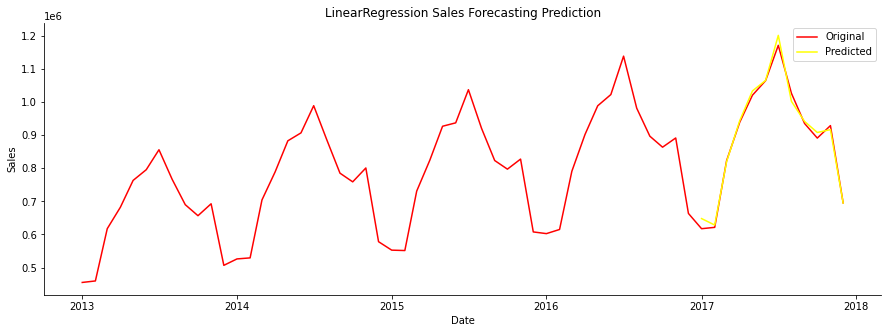

In [156]:
run_model(train, test, LinearRegression(), 'LinearRegression')


RMSE: 17003.12341894865
MAE: 14165.0
R2 Score: 0.9897987265968357


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


RMSE: 13574.792631933646
MAE: 11649.666666666666
R2 Score: 0.9934977542289017


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


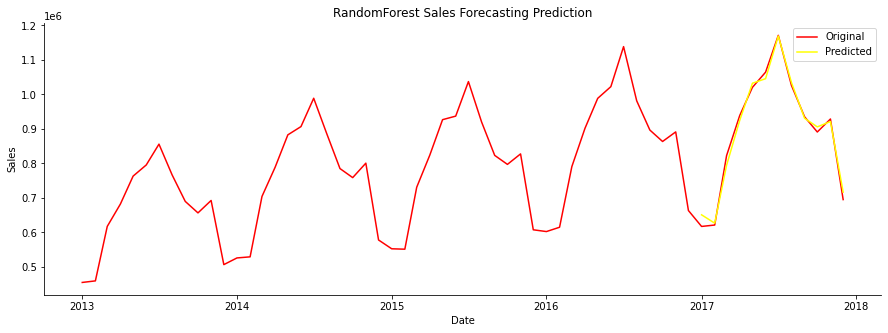

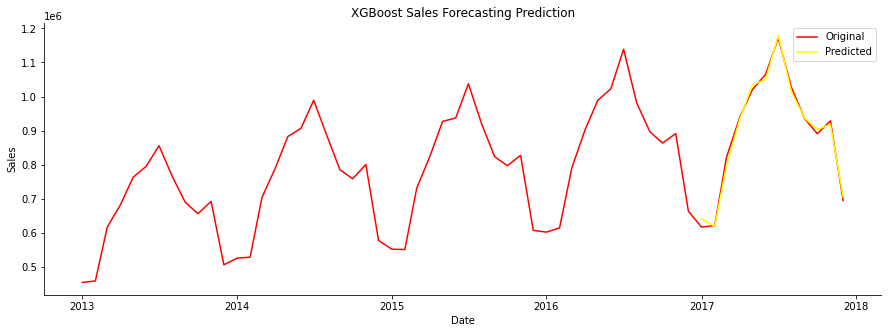

In [157]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

run_model(train, test, RandomForestRegressor(n_estimators = 100, max_depth=20,
                                    ), "RandomForest")
run_model(train, test, XGBRegressor(n_estimators=100,
                                    learning_rate = 0.2,
                                    objective="reg:squarederror"), "XGBoost")

In [158]:
def lstm_model(train_data, test_data):
    x_train, y_train, x_test, y_test, scaler_object = scale_data(train_data, test_data)
    print("x_train shape before", x_train.shape)
    x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
    print(x_train.shape)
    x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
    
    model = Sequential()
    model.add(LSTM(4, batch_input_shape= (1, x_train.shape[1], x_train.shape[2]), stateful=True))
    model.add(Dense(1))
    model.add(Dense(1))
    model.compile(loss="mean_squared_error", optimizer="adam")
    model.fit(x_train, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False)
    
    predictions = model.predict(x_test, batch_size=1)
    
    original_df = load_original_df()
    unscaled_df = undo_scaling(predictions, x_test, scaler_object, lstm=True)
    unscaled_df = predict_df(unscaled_df, original_df)
    get_scores(unscaled_df, original_df, "LSTM")
    plot_results(unscaled_df, original_df, "LSTM")


x_train shape before (35, 12)
(35, 1, 12)
Epoch 1/200
35/35 [==============================] - 2s 2ms/step - loss: 0.2824
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2712
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2599
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2480
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2351
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2211
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2060
Epoch 8/200
35/35 [==============================] - 0s 2ms/step - loss: 0.1900
Epoch 9/200
35/35 [==============================] - 0s 2ms/step - loss: 0.1734
Epoch 10/200
35/35 [==============================] - 0s 2ms/step - loss: 0.1567
Epoch 11/200
35/35 [==============================] - 0s 2ms/step - loss: 0.1404
Epoch 12/200
35/35 [==============================] - 0s 2ms/step - loss: 0.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


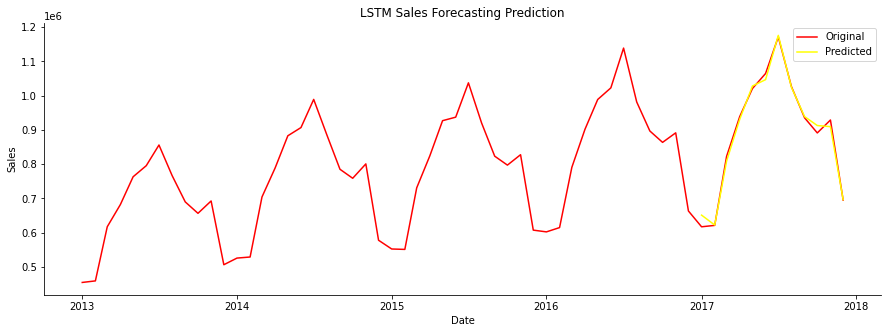

In [159]:
lstm_model(train, test)
pickle.dump(model_scores, open( "model_scores.p", "wb" ) )

In [160]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pickle

In [161]:
def load_data():
  return pd.read_csv("arima_df.csv")
ts_data = load_data()
ts_data.index = pd.to_datetime(ts_data.index)
ts_data

,date,sales_diff
1970-01-01 00:00:00.000000000,2013-02-01,4513.0
1970-01-01 00:00:00.000000001,2013-03-01,157965.0
1970-01-01 00:00:00.000000002,2013-04-01,64892.0
1970-01-01 00:00:00.000000003,2013-05-01,80968.0
1970-01-01 00:00:00.000000004,2013-06-01,32355.0
1970-01-01 00:00:00.000000005,2013-07-01,60325.0
1970-01-01 00:00:00.000000006,2013-08-01,-89161.0
1970-01-01 00:00:00.000000007,2013-09-01,-76854.0
1970-01-01 00:00:00.000000008,2013-10-01,-33320.0
1970-01-01 00:00:00.000000009,2013-11-01,36056.0


In [162]:
def get_scores(data):
    
    model_scores = {}
    
    rmse = np.sqrt(mean_squared_error(data.sales_diff[-12:], data.forecast[-12:]))
    mae = mean_absolute_error(data.sales_diff[-12:], data.forecast[-12:])
    r2 = r2_score(data.sales_diff[-12:], data.forecast[-12:])
    model_scores['ARIMA'] = [rmse, mae, r2]
    
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")
    
    


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  % freq, ValueWarning)


RMSE: 14959.89346608319
MAE: 11265.335748412077
R2 Score: 0.9835642876238073


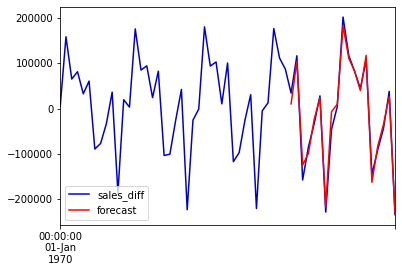

In [163]:
def sarimax_model(data):
  sar = sm.tsa.statespace.SARIMAX(ts_data.sales_diff,
                                  order=(12, 0,0), seasonal_order=(0, 1, 0, 12),
                                  trend='c').fit()
  start, end, dynamic = 40, 100, 7
  data['forecast'] = sar.predict(start=start, end=end, 
                                 dynamic=dynamic)
  pred_df = data.forecast[start+dynamic:end]

  data[["sales_diff", "forecast"]].plot(color=["mediumblue", "red"]
                                        )
  get_scores(data)
  return sar, data, pred_df

sar, ts_data, predictions = sarimax_model(ts_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py:4294: UserWarning: Attempting to set identical left == right == 719163.0 results in singular transformations; automatically expanding.
  ax.set_xlim(ix[0], ix[-1])


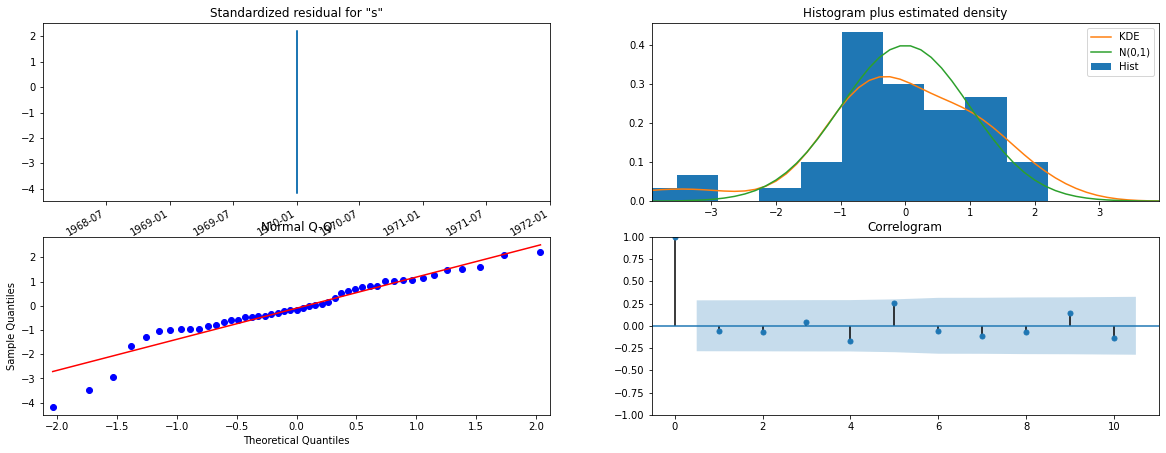

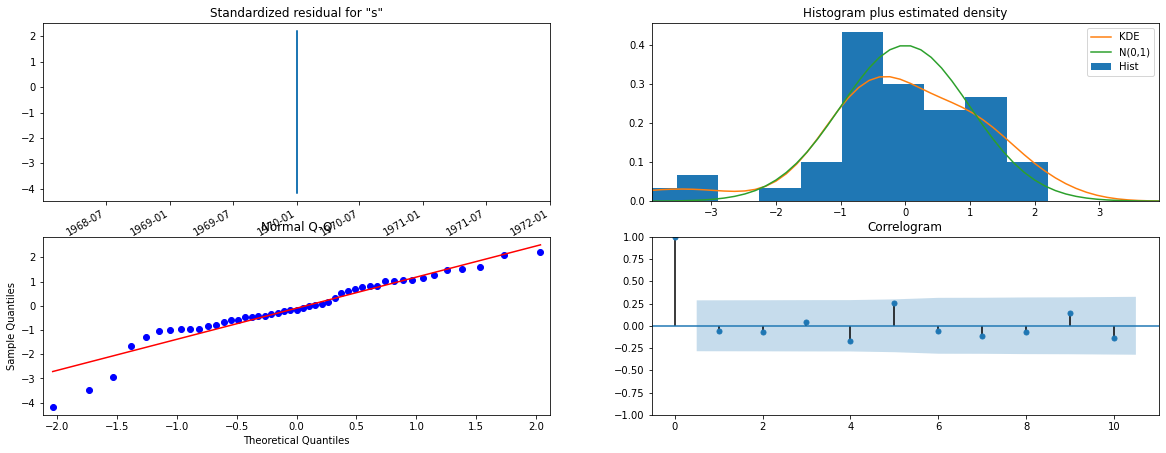

In [164]:
sar.plot_diagnostics(figsize=(20, 8))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


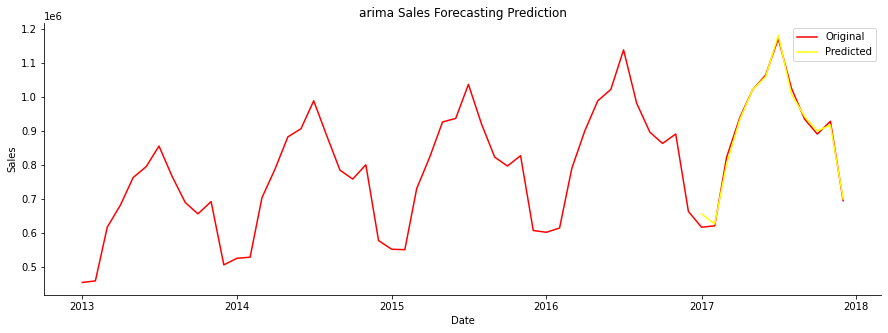

In [165]:
def predict_df(prediction_df):
  original_df = pd.read_csv("train.csv")
  original_df.date = original_df.date.apply(lambda x: str(x)[:-3])
  original_df = original_df.groupby("date")["sales"].sum().reset_index()
  original_df.date = pd.to_datetime(original_df.date)

  result_list = []
  sales_dates = list(original_df[-13:].date)
  act_sales = list(original_df[-13:].sales)

  for index in range(0, len(prediction_df)):
    result_dict = {}
    result_dict["pred_value"] = int(prediction_df[index] + act_sales[index])
    result_dict["date"] = sales_dates[index+1]
    result_list.append(result_dict)
  df_result = pd.DataFrame(result_list)
  return df_result, original_df

prediction_df, original_df = predict_df(predictions)
plot_results(prediction_df, original_df, "arima")

In [166]:
def create_results_df():
  result_dict = pickle.load(open("model_scores.p",
                                 "rb"))
  result_dict.update(pickle.load(open("arima_model_scores.p",
                                      "rb")))
  results_df = pd.DataFrame.from_dict(result_dict,
                                     orient='index',
                                     columns=["RMSE", "MAE", "R2"])
  results_df = results_df.sort_values(by="RMSE",
                                      ascending=False).reset_index()
  return results_df

results = create_results_df()
results

,index,RMSE,MAE,R2
0,RandomForest,17003.123419,14165.000000,0.989799
1,LinearRegression,16221.040791,12433.000000,0.990716
2,ARIMA,14959.893466,11265.335748,0.983564
3,LSTM,14916.570805,11215.250000,0.992149
4,XGBoost,13574.792632,11649.666667,0.993498


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


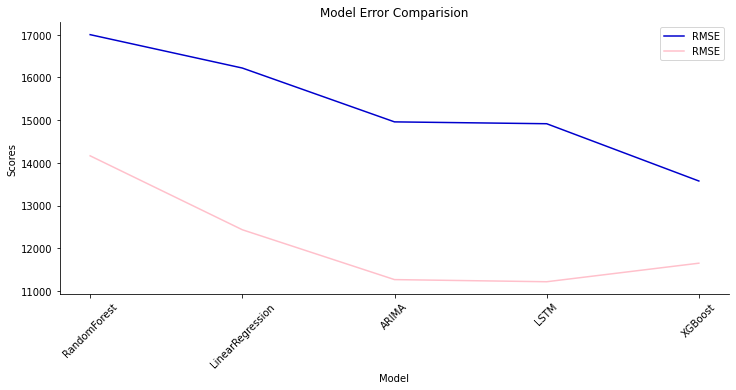

In [169]:
def plot_results(results_df):
  fig, ax = plt.subplots(figsize=(12, 5))
  sns.lineplot(np.arange(len(results_df)), 'RMSE',
               data=results_df, ax=ax,
               label="RMSE", color="mediumblue")
  sns.lineplot(np.arange(len(results_df)), 'MAE',
               data=results_df, ax=ax,
               label="RMSE", color="pink")
  plt.xticks(np.arange(len(results_df)), rotation=45)
  ax.set_xticklabels(results_df['index'])
  ax.set(xlabel="Model",
         ylabel="Scores",
         title="Model Error Comparision")
  sns.despine()
  plt.savefig("compare_models.png")
plot_results(results)

In [171]:
average_monthly_sales = 894478 
gboost = 11649.66667
percentage_off = round(gboost/average_monthly_sales* 100, 2)
print(f"With XGBoost, prediction is within {percentage_off}% of the actual.")

With XGBoost, prediction is within 1.3% of the actual.
